In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy import stats

In [44]:
df = pd.read_csv('source/raw_vol2.0.csv')

In [45]:
df.columns

Index(['MEET', 'RC_DATE', 'RC_NO', 'RC_DIST', 'RANK', 'WEATHER', 'TR_CON',
       'TR_WC', 'ORD', 'CHUL_NO', 'HR_NAME', 'HR_NO', 'NAME', 'PRD_NAME',
       'AGE', 'SEX', 'horse_weight', 'weight_gain', 'RC_TIME', 'ORD1_CNT_T',
       'ORD2_CNT_T', 'RC_CNT_T', 'ORD1_CNT_Y', 'ORD2_CNT_Y', 'RC_CNT_Y',
       'WG_BUDAM', 'JK_NAME', 'JK_NO', 'JK_AGE', 'JK_CAREER', 'JK_ORD1_CNT_T',
       'JK_ORD2_CNT_T', 'JK_RC_CNT_T', 'JK_ORD1_CNT_Y', 'JK_ORD2_CNT_Y',
       'JK_RC_CNT_Y', 'TR_NAME', 'TR_NO', 'TR_AGE', 'TR_CAREER',
       'TR_ORD1_CNT_T', 'TR_ORD2_CNT_T', 'TR_RC_CNT_T', 'TR_ORD1_CNT_Y',
       'TR_ORD2_CNT_Y', 'TR_RC_CNT_Y', 'HR_ORD1_CNT_T', 'HR_ORD2_CNT_T',
       'HR_RC_CNT_T', 'SJ_S1F_ORD', 'SJ_1C_ORD', 'SJ_2C_ORD', 'SJ_3C_ORD',
       'SJ_G3F_ORD', 'SJ_4C_ORD', 'SJ_G1F_ORD', 'SE_S1F_ACC_TIME',
       'SE_1C_ACC_TIME', 'SE_2C_ACC_TIME', 'SE_3C_ACC_TIME', 'SE_G3F_ACC_TIME',
       'SE_4C_ACC_TIME', 'SE_G1F_ACC_TIME', 'JE_S1F_TIME', 'JE_1C_TIME',
       'JE_2C_TIME', 'JE_3C_TIME', 'JE_G3F_

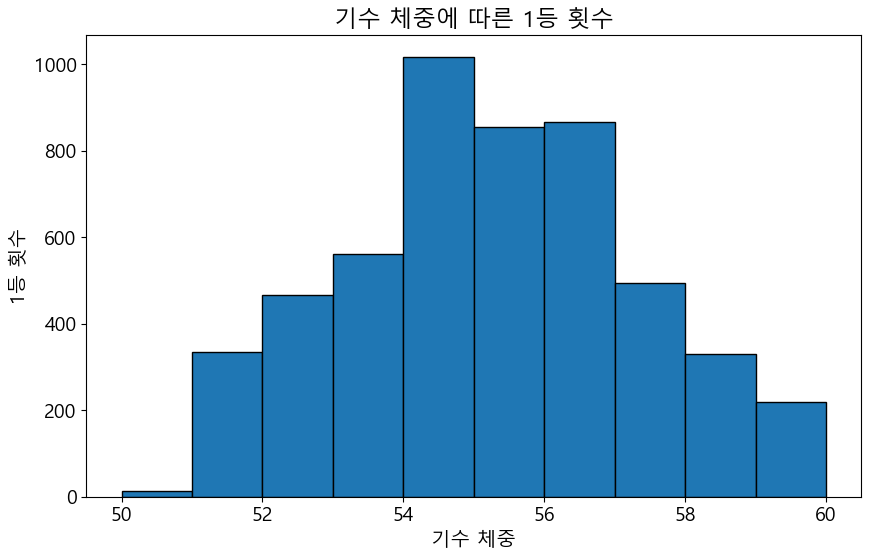

In [46]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 14

# ORD가 1인 행들만 필터링
ord_1_df = df[df['ORD'] == 1]
# 히스토그램 생성: x축은 WG_BUDAM, y축은 ORD == 1의 빈도수
plt.figure(figsize=(10, 6))
plt.hist(ord_1_df['WG_BUDAM'], bins=[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], edgecolor='black')
plt.xlabel('기수 체중')  # x축 라벨
plt.ylabel('1등 횟수')  # y축 라벨
plt.title('기수 체중에 따른 1등 횟수')  # 제목
plt.show()

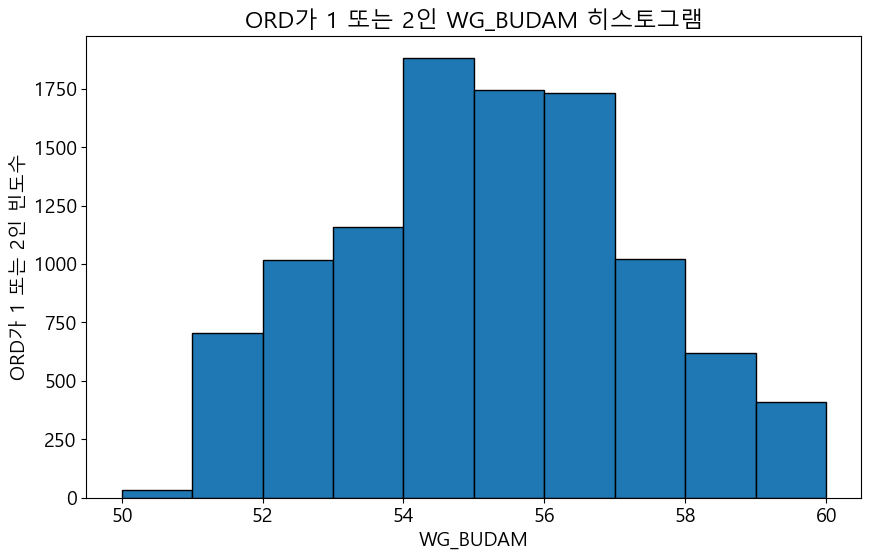

In [47]:
import matplotlib.pyplot as plt

# ORD가 1 또는 2인 행들만 필터링
ord_1_or_2_df = df[df['ORD'].isin([1, 2])]
indices = list(range(50, 61)) 

# 히스토그램 생성: x축은 WG_BUDAM, y축은 ORD가 1 또는 2인 빈도수
plt.figure(figsize=(10, 6))
plt.hist(ord_1_or_2_df['WG_BUDAM'], bins=indices, edgecolor='black')
plt.xlabel('WG_BUDAM')  # x축 라벨
plt.ylabel('ORD가 1 또는 2인 빈도수')  # y축 라벨
plt.title('ORD가 1 또는 2인 WG_BUDAM 히스토그램')  # 제목
plt.show()

In [48]:
#체중의 변화가 없는 말이 1등할 확률이 높을 것이다.
# 데이터 불러오기
file_path = 'source/raw_vol2.0.csv'
df = pd.read_csv(file_path)
indices = list(range(50, 61)) 
# weight_gain을 기준으로 범주화 (예시)
df['WGB'] = pd.cut(df['WG_BUDAM'], bins=indices, include_lowest=False)

# 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(df['ORD'], df['WGB'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square test statistic: 1129.2114398189458
p-value: 3.78645754131838e-165
Degrees of freedom: 117
Expected frequencies: [[396.79917008 571.9473148  586.24123303 973.4158315  858.20685056
  752.43185565 497.04718327 301.60167466 111.01609826  95.2927882 ]
 [396.87630833 572.05850207 586.35519905 973.60506475 858.37368704
  752.57812934 497.14380986 301.6603064  111.03767992  95.31131324]
 [395.71923455 570.39069302 584.64570868 970.76656601 855.87113985
  750.38402401 495.694411   300.78083029 110.71395491  95.03343769]
 [395.25640503 569.7235694  583.96191252 969.63116652 854.87012097
  749.50638188 495.11465145 300.42903985 110.5844649   94.92228747]
 [395.64209629 570.27950575 584.53174265 970.57733277 855.70430337
  750.23775032 495.59778441 300.72219855 110.69237324  95.01491265]
 [395.56495804 570.16831848 584.41777663 970.38809952 855.53746689
  750.09147663 495.50115781 300.66356681 110.67079157  94.99638762]
 [395.48781979 570.05713121 584.3038106  970.19886627 855.37063041


In [49]:
contingency_table

WGB,"(50, 51]","(51, 52]","(52, 53]","(53, 54]","(54, 55]","(55, 56]","(56, 57]","(57, 58]","(58, 59]","(59, 60]"
ORD,,,,,,,,,,
1,245,407,512,946,876,914,586,383,148,127
2,295,445,546,894,899,861,589,375,126,115
3,299,498,543,931,877,788,571,373,138,112
4,379,517,542,901,839,810,572,338,129,97
5,381,567,531,971,858,785,487,321,114,114
6,386,593,557,981,860,726,515,309,107,94
7,443,608,616,968,846,686,500,271,98,91
8,454,588,618,996,856,687,398,287,94,84
9,433,590,577,968,768,608,419,232,110,75


In [50]:
# 데이터에서 1등(ORD == 1)의 수 확인
ord_1_count = df[df['ORD'] == 1]['ORD'].count()
print("1등 총 횟수:", ord_1_count)


1등 총 횟수: 5215


In [51]:
# 교차표에서 1등 빈도 합산
crosstab_1_sum = contingency_table.loc[1].sum()
print("교차표의 1등 횟수 합계:", crosstab_1_sum)


교차표의 1등 횟수 합계: 5144
